<a href="https://colab.research.google.com/github/raamiiChu/NCCU_110-2_Group26_Applications-of-mathematics-softwares/blob/main/G26_gradio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 下載模組

In [1]:
!pip install speechbrain==0.5.12
!pip install gradio
# !pip install pydub  # 語音檔轉換

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 載入模組

In [2]:
import torch  # 在本專案中只有轉換資料型態的功能而已
import torchaudio  # 將語音檔轉換成數字

from tensorflow.keras.models import load_model
from speechbrain.pretrained import EncoderClassifier

# import os
import gradio as gr
import numpy as np
import pandas as pd

# from pydub import AudioSegment  # 轉換錄音檔副檔名
from typing import Dict  # 函数注解（Function Annotations）

/usr/local/lib/python3.9/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


## 主程式

#### 運行結果截圖
詳細錄音檔與測試結果：https://drive.google.com/drive/u/2/folders/1uPD6MPPOZP_6ejbKT_-Jb6MDMly9GROm

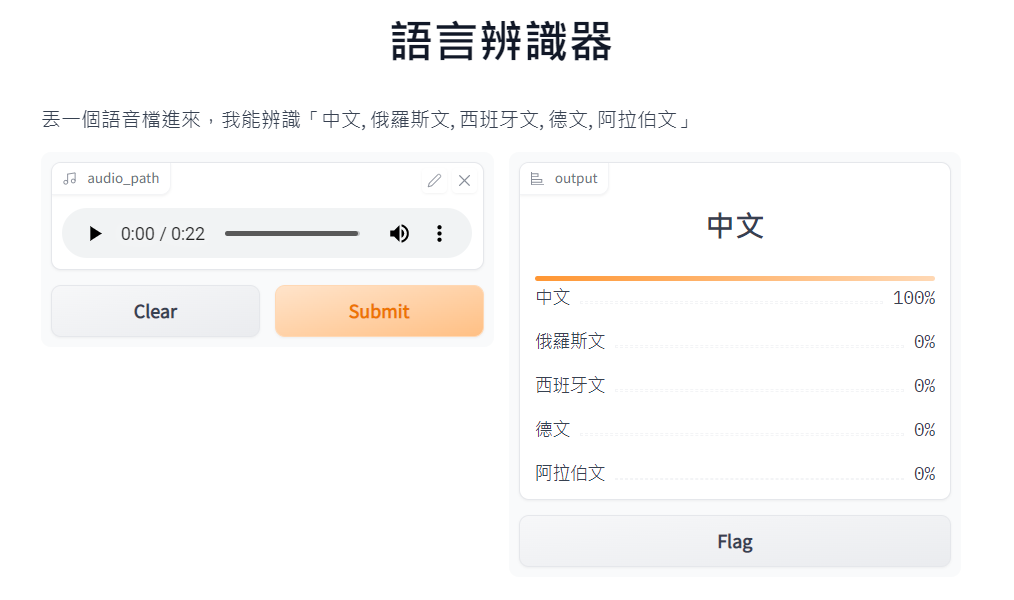

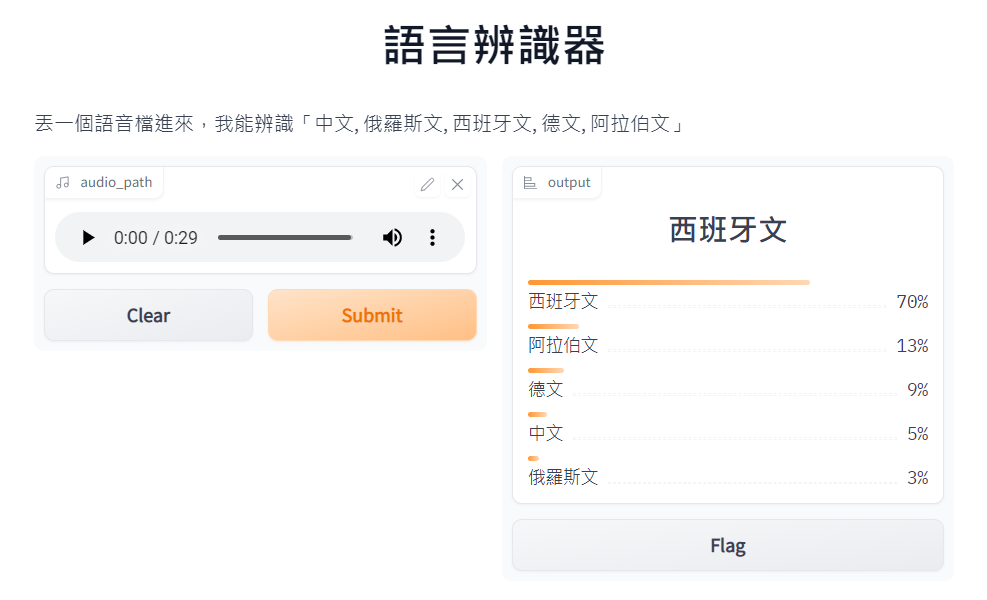

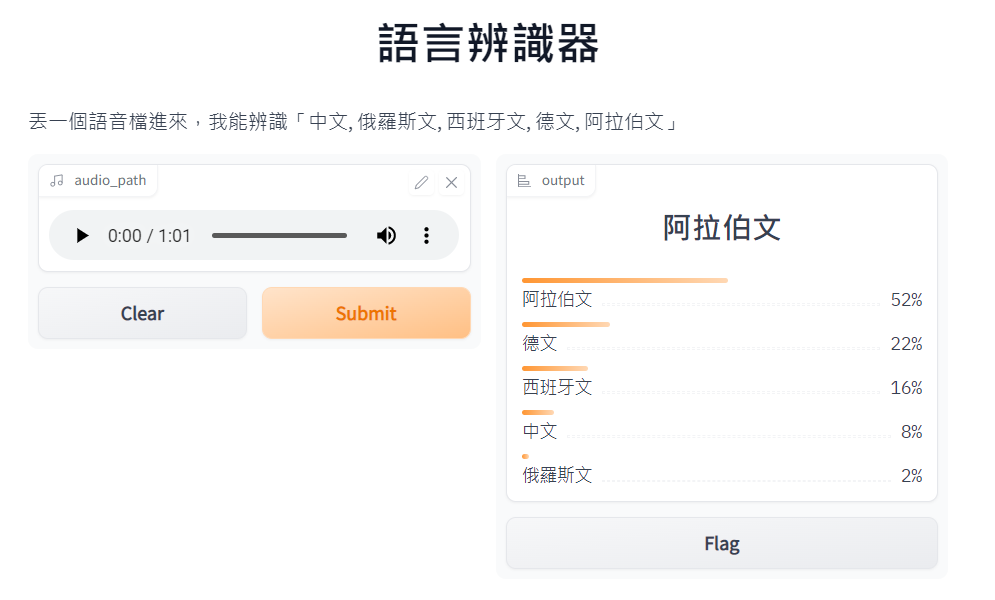

#### 程式碼

In [3]:
!git clone https://github.com/raamiiChu/NCCU_110-2_Group26_Applications-of-mathematics-softwares.git

fatal: destination path 'NCCU_110-2_Group26_Applications-of-mathematics-softwares' already exists and is not an empty directory.


In [4]:
model_path = "/content/NCCU_110-2_Group26_Applications-of-mathematics-softwares/Group26_audio_classification_model"
model = load_model(model_path)
language_id = EncoderClassifier.from_hparams(source="TalTechNLP/voxlingua107-epaca-tdnn", savedir="tmp")

程式碼參考來源 \
- mp3 轉換：https://stackoverflow.com/questions/38110384/convert-any-audio-file-to-mp3-with-python 
- 語音轉數字：https://huggingface.co/TalTechNLP/voxlingua107-epaca-tdnn \

In [5]:
def language_recognition(audio_path:str) -> Dict[str,float]:
    # 轉換成 mp3 (已經不需要轉換了!!!)
    # file_name, format = os.path.splitext(audio_path)

    # if not format == ".mp3":        
    #     audio_file = AudioSegment.from_file(audio_path, format=format[1:])
    #     audio_path = f"{file_name}.mp3"
    #     audio_file.export(audio_path, format="mp3")

    # 語音轉數字
    signal = language_id.load_audio(audio_path)
    embedding =  language_id.encode_batch(signal)
    # 把資料從 torch.tensor 轉成 numpy.array ，並且將維度設定為(256,)
    embedding = np.array([emb.numpy().reshape(256,) for emb in embedding])

    lang_list = ["中文", "俄羅斯文", "西班牙文", "德文", "阿拉伯文"]  # 語言對照表
    prediction = model.predict(embedding).flatten()  # 預測結果，並且拉平它

    return {lang_list[i]: float(prediction[i]) for i in range(5)}

In [6]:
input = gr.inputs.Audio(type="filepath")  # 輸入為「語音檔的位置」
iface = gr.Interface(language_recognition,
                     inputs=input,
                     outputs="label",
                     title="語言辨識器",
                     description="丟一個語音檔進來，我能辨識「中文, 俄羅斯文, 西班牙文, 德文, 阿拉伯文」")
iface.launch(share=True)

/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:319: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://8f9c6a45918508e13b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
